In [24]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [2]:
test = np.load('test.npz')
train = np.load('train.npz')

In [3]:
y_test = test['label']
X_test = test['image']
y_train = train['label']
X_train = train['image']

In [4]:
X_train.shape

(12000, 28, 28)

In [6]:
X_test.shape

(5768, 28, 28)

In [7]:
28 * 28

784

In [8]:
np.unique(X_train)

array([  0.,  11.,  16.,  17.,  46.,  47.,  52.,  53.,  54.,  59.,  60.,
        89.,  90.,  95.,  96.,  97., 102., 103., 132., 133., 138., 139.,
       140., 145., 146., 175., 176., 181., 182., 183., 188., 189., 218.,
       219., 224., 225.])

In [9]:
np.unique(X_test)

array([  0.,  11.,  16.,  17.,  46.,  47.,  52.,  53.,  54.,  59.,  60.,
        89.,  90.,  95.,  96.,  97., 102., 103., 132., 133., 138., 139.,
       140., 145., 146., 152., 175., 176., 181., 182., 183., 188., 189.,
       218., 219., 224., 225.])

In [13]:
def print_single_pic(data, i):
    pic = data[i, :, :]
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            if pic[i, j] >= 133:
                print('◼︎', end='')
            else:
                print('◻︎', end='')
        print()

In [17]:
print_single_pic(X_train, 3)

◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◼︎◻︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◼︎◼︎◼︎◼︎◼︎◻︎◻︎◼︎◼︎◼︎◼︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎
◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻︎◻

In [23]:
cnt = Counter(y_train)
cnt

Counter({1.0: 1473,
         2.0: 1288,
         5.0: 943,
         6.0: 1116,
         0.0: 1332,
         4.0: 1316,
         3.0: 1216,
         7.0: 853,
         9.0: 1393,
         8.0: 1070})

<BarContainer object of 10 artists>

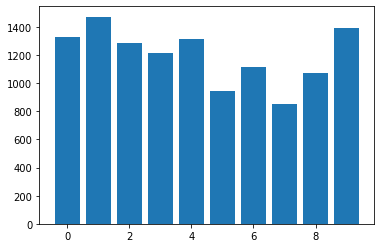

In [25]:
num = list(cnt.keys())
count = list(cnt.values())

plt.bar(num, count)